# Birthday problem

The problem was discussed in the [TED lesson](http://ed.ted.com/lessons/check-your-intuition-the-birthday-problem-david-knuffke). Here we present its solution using Python.

In [1]:
# import plotting environment and numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Problem formulation

Recall the problem: how big a group of people would have to be before there’s more than a 50% chance that two people in the group have the same birthday?

## Solution

Suppose there are 365 days in the year, and find the probability of complementary event $A_n$: there's no coincidences of birthdays in the group of $n$ people. So the problem reformulates as follows: what is the minimum group size $n$ such that $P(A_n)\leq0.5$. For $n=1$ we have $P(A_1)=1$. If we add a member to the group, for the event $A_2$ to occur the birthday of the new member whould fall in one of 364 remaining days, so the probability $P(A_2)=1\times \frac{364}{365}=1\times\left(1-\frac1{365}\right)$. Adding a third member to the group provides $P(A_3)=1\times\left(1-\frac1{365}\right)\times\left(1-\frac2{365}\right)$. Continuing up to $n$ members we get $$ P(A_n)=1\times\left(1-\frac1{365}\right)\cdots\times\left(1-\frac{n-1}{365}\right)=\prod_{k=0}^{n-1}\left(1-\frac{k}{365}\right). $$ Let's make calculations.

In [2]:
# define as array of multipliers
ndays = 365
x = pd.Series(range(ndays, 0, -1), index=range(1,ndays+1))

# show 10 first members of x
print('original:')
print(x[:10])

original:
1     365
2     364
3     363
4     362
5     361
6     360
7     359
8     358
9     357
10    356
dtype: int32


In [3]:
# divide x by ndays
x = x / ndays
print('normalized')
print(x[:10].round(3))

normalized
1     1.000
2     0.997
3     0.995
4     0.992
5     0.989
6     0.986
7     0.984
8     0.981
9     0.978
10    0.975
dtype: float64


In [4]:
# compute cumulative product
xc = x.cumprod()
print('cum product:')
print(xc[:10].round(3))

cum product:
1     1.000
2     0.997
3     0.992
4     0.984
5     0.973
6     0.960
7     0.944
8     0.926
9     0.905
10    0.883
dtype: float64


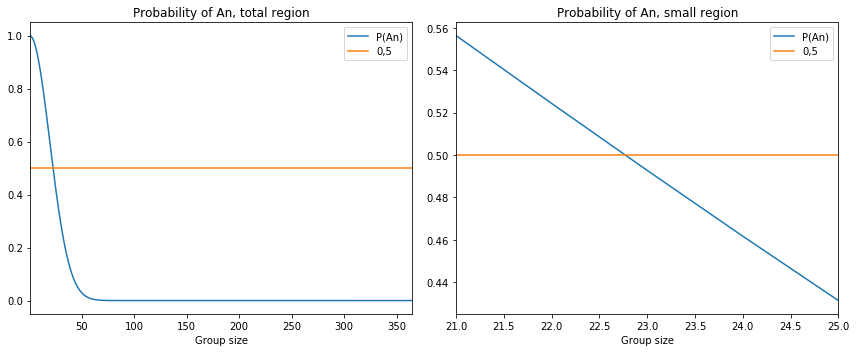

In [5]:
one_half = pd.Series(0.5, index=xc.index)

figsize(12,5)
subplot(1,2,1)
xc.plot(label='P(An)')
one_half.plot(label='0,5')
title('Probability of An, total region')
xlabel('Group size')
legend()

subplot(1,2,2)
n_min = 20; n_max = 25
xc[n_min:n_max].plot(label='P(An)')
one_half[n_min:n_max].plot(label='0,5')
title('Probability of An, small region')
xlabel('Group size')
legend()
tight_layout()

We see that the group size 23 is the minimum size for which probability of $A_n$ is less that one half, or the probability of matching birthdays is greater that one half.

In [6]:
# check that
print(xc[22].round(3), xc[23].round(3))

0.524 0.493
